In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [102]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
train_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
test_ids = test_data['PassengerId']
test_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [104]:
train_data.isna().sum(), len(train_data)

(Survived      0
 Pclass        0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64,
 891)

In [105]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [106]:
train_data['Embarked'] = train_data['Embarked'].fillna(value=train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(value=test_data['Embarked'].mode()[0])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [107]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [108]:
train_data['Age'] = train_data['Age'].fillna(value=train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(value=test_data['Age'].mean())
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [109]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [110]:
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [111]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [112]:
ordinal_encoder = OrdinalEncoder()
train_data[['Embarked']] = ordinal_encoder.fit_transform(train_data[['Embarked']])
test_data[['Embarked']] = ordinal_encoder.transform(test_data[['Embarked']])

In [113]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0


In [114]:
y = train_data['Survived']
train_data.drop(columns=['Survived'], inplace=True)

In [115]:
minmaxscaler = MinMaxScaler()

train_data = minmaxscaler.fit_transform(train_data)
test_data = minmaxscaler.transform(test_data)

In [116]:
X = train_data
X.shape, y.shape

((891, 7), (891,))

In [124]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_test = test_data

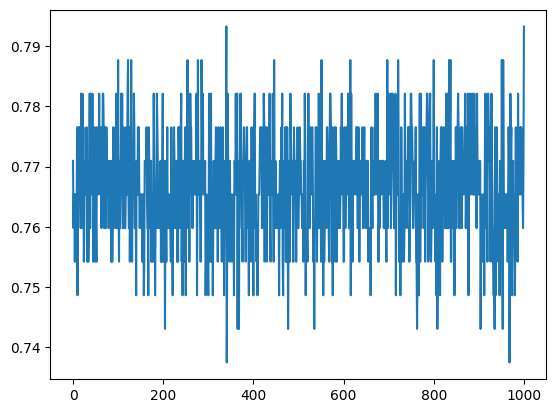

In [125]:
val_accs = []
test_accs = []
max_acc = 0
max_state = 0
for i in range(1001):
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_train, y_train)
    val_accuracy = 0
    val_pred = model.predict(X_val)
    val_accuracy = sum(val_pred==list(y_val))/len(y_val)
    test_accuracy = 0
    test_pred = model.predict(X_val)
    test_accuracy = sum(val_pred==list(y_val))/len(y_val)
    test_accs.append(test_accuracy)
    if test_accuracy > max_acc:
        max_acc = test_accuracy
        max_state = i
# plt.plot(val_accs)
plt.plot(test_accs)

In [126]:
max_state

340

In [129]:
model = DecisionTreeClassifier(random_state=max_state)
model.fit(X_train, y_train)
pred = model.predict(X_test)

submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': pred})

submission.to_csv('submission.csv', index=False)